Import base librairies (more later)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import sys

# First contact with the data
Load and inspect the data

In [4]:
df = pd.read_csv('../data/happiness_long.csv')

In [5]:
df

country                           region  year  happiness      gdp  \
0    Afghanistan                    Southern Asia  2015      3.575  0.31982   
1        Albania       Central and Eastern Europe  2015      4.959  0.87867   
2        Algeria  Middle East and Northern Africa  2015      5.605  0.93929   
3      Argentina      Latin America and Caribbean  2015      6.574  1.05351   
4        Armenia       Central and Eastern Europe  2015      4.350  0.76821   
..           ...                              ...   ...        ...      ...   
715    Venezuela      Latin America and Caribbean  2019      4.707  0.96000   
716      Vietnam                Southeastern Asia  2019      5.175  0.74100   
717        Yemen  Middle East and Northern Africa  2019      3.380  0.28700   
718       Zambia               Sub-Saharan Africa  2019      4.107  0.57800   
719     Zimbabwe               Sub-Saharan Africa  2019      3.663  0.36600   

      health  generosity   social  corruption  
0    0.30335     0.36510  0.30285     0.09719  
1    0.81325     0.14272  0.80434     0.06413  
2    0.61766     0.07822  1.07772     0.17383  
3    0.78723     0.11451  1.24823     0.08484  
4    0.72990     0.07855  0.77711     0.03900  
..       ...         ...      ...         ...  
715  0.80500     0.06400  0.15400     0.04700  
716  0.85100     0.14700  0.54300     0.07300  
717  0.46300     0.10800  0.14300     0.07700  
718  0.42600     0.24700  0.43100     0.08700  
719  0.43300     0.15100  0.36100     0.08900  

[720 rows x 9 columns]

In [6]:
df.describe()

year   happiness         gdp      health  generosity  \
count   720.000000  720.000000  720.000000  720.000000  720.000000   
mean   2017.000000    5.433007    0.939021    0.634448    0.218768   
std       1.415197    1.117052    0.393786    0.236113    0.124482   
min    2015.000000    2.839000    0.000000    0.000000    0.000000   
25%    2016.000000    4.547250    0.653763    0.498102    0.128474   
50%    2017.000000    5.427000    1.004000    0.667857    0.201725   
75%    2018.000000    6.242500    1.250385    0.814630    0.282035   
max    2019.000000    7.769000    1.870766    1.141000    0.838075   

           social  corruption  
count  720.000000  720.000000  
mean     0.929049    0.123459  
std      0.399115    0.106336  
min      0.000000    0.000000  
25%      0.571654    0.052862  
50%      0.987405    0.088507  
75%      1.255679    0.153645  
max      1.644000    0.551910

All the zeros are actually missing data. Replace them by NaNs.

In [7]:
df_na = df.copy()
for col in ('gdp', 'health', 'generosity', 'social', 'corruption'):
    df_na.loc[df[col]==0, col] = np.nan

A few basic plots

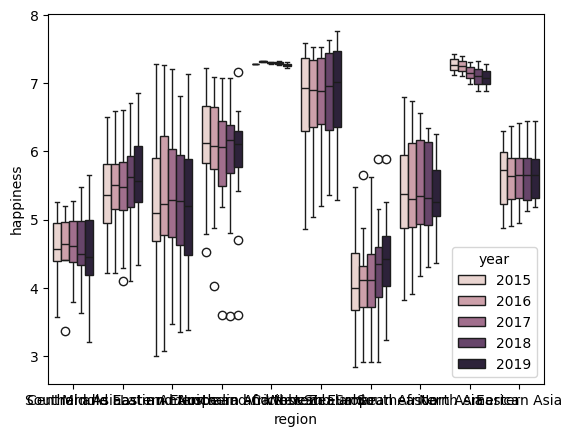

In [8]:
sns.boxplot(df_na, x='region', y='happiness', hue='year');

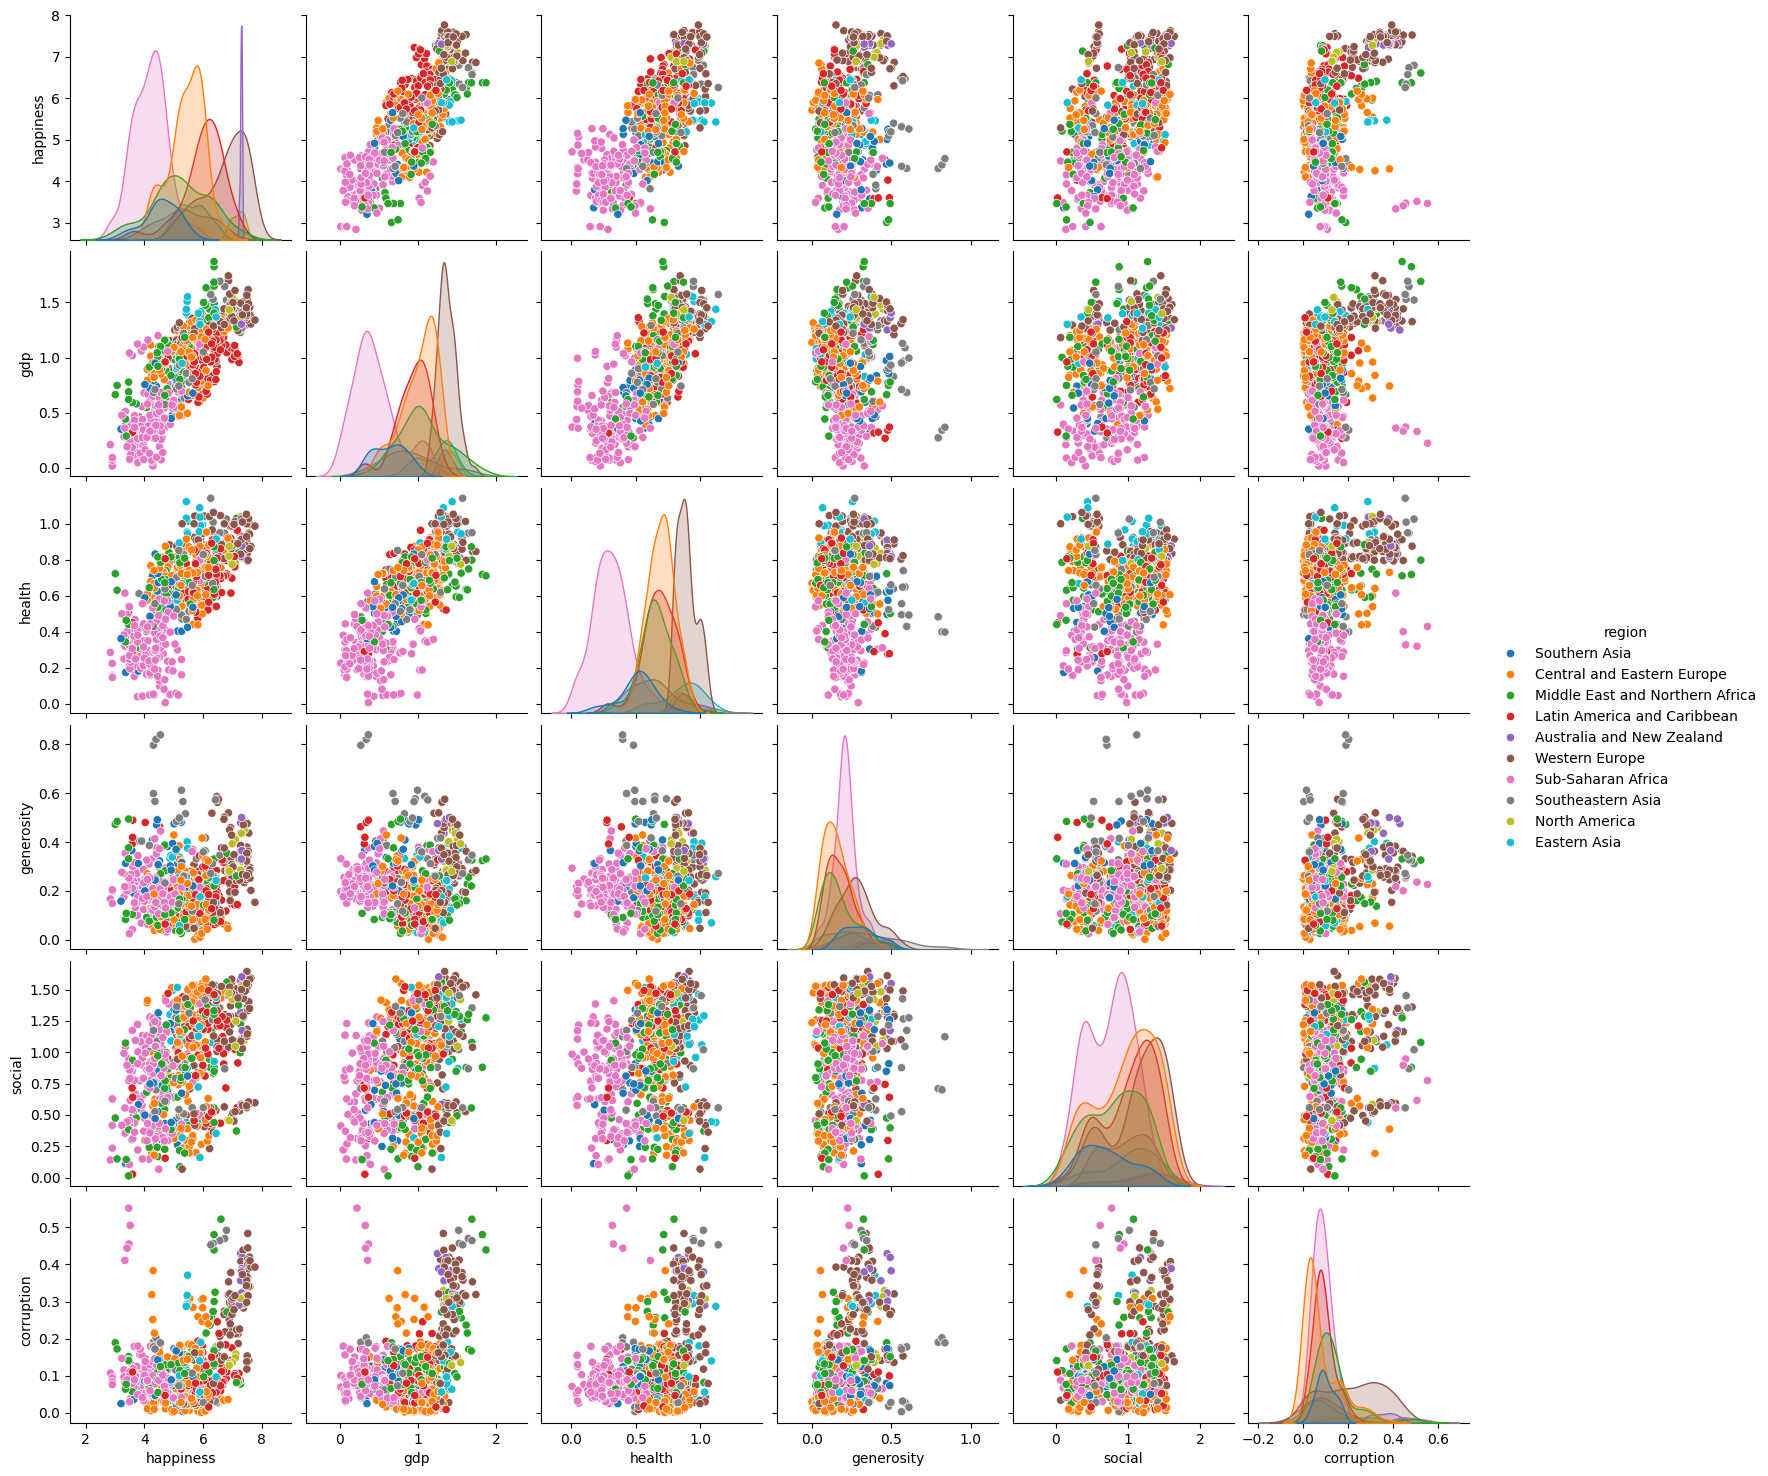

In [9]:
sns.pairplot(df_na, vars=['happiness', 'gdp', 'health', 'generosity', 'social', 'corruption'], hue='region');

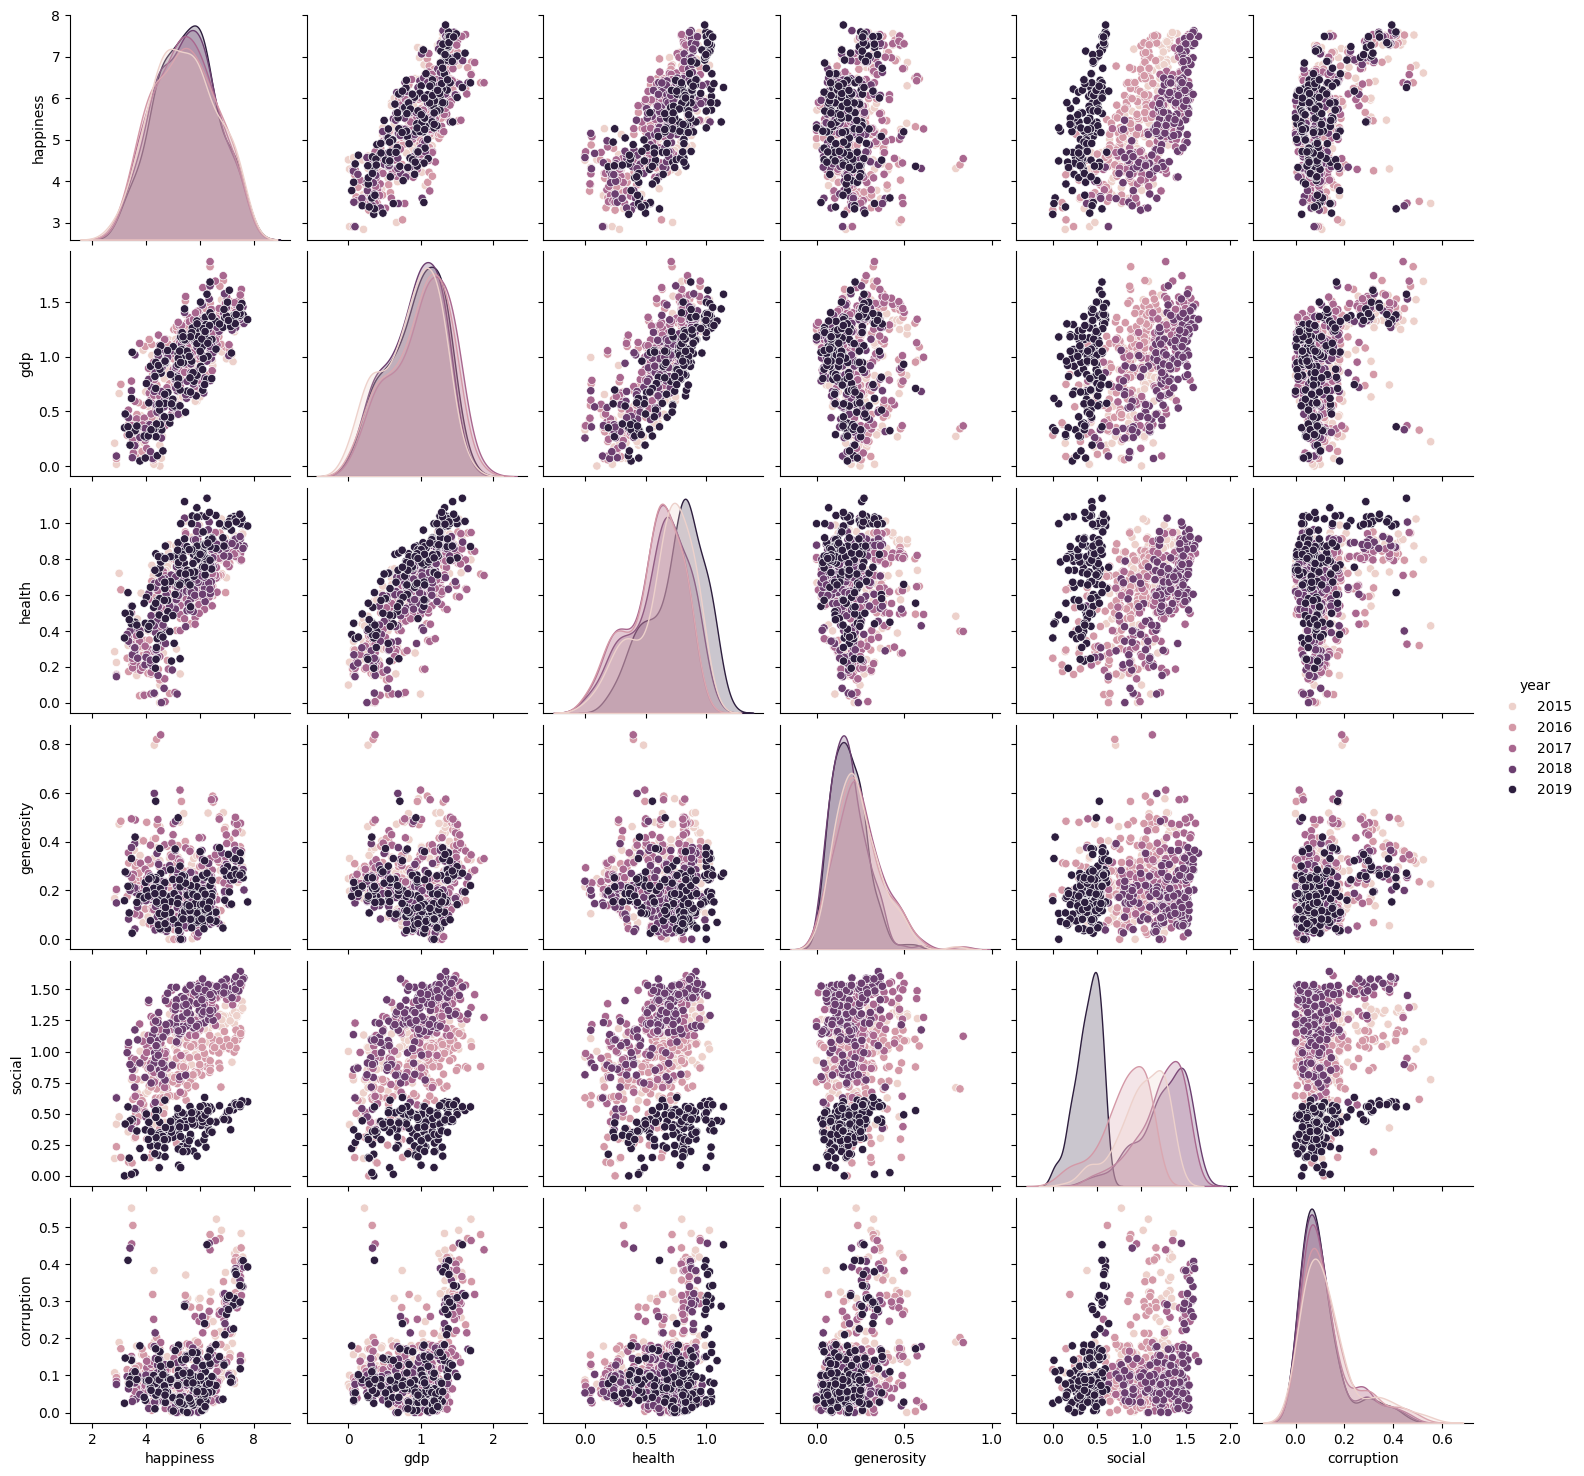

In [10]:
df_NorthAmerica = df_na[df_na['region']=='USA/Canada']
sns.pairplot(df, vars=['happiness', 'gdp', 'health', 'generosity', 'social', 'corruption'], hue='year');

# Linear models
First linear model without interactions, on the whole dataset.

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('happiness ~ year + gdp + health + generosity + social + corruption', df_na).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     310.2
Date:                Fri, 31 Oct 2025   Prob (F-statistic):          7.13e-193
Time:                        12:08:00   Log-Likelihood:                -620.51
No. Observations:                 703   AIC:                             1255.
Df Residuals:                     696   BIC:                             1287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.6976     34.225     -2.066      0.039    -137.895      -3.500
year           0.0363      0.017      2.137      0.033       0.003       0.070
gdp            1.1124      0.101     10.963      0.000       0.913       1.312
health         1.7665      0.158     11.166      0.000       1.456       2.077
generosity     0.7279      0.192      3.782      0.000       0.350       1.106
social         0.5731      0.065      8.779      0.000       0.445       0.701
corruption     1.1341      0.237      4.795      0.000       0.670       1.598
==============================================================================
Omnibus:                       13.953   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.228
Skew:                          -0.341   Prob(JB):                     0.000814
Kurtosis:                       3.146   Cond. No.                     3.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## PCA
Build a DF with the principal components and quantitative variables.

In [14]:
quantitative_variables = df.describe().columns.tolist()

In [15]:
from sklearn.decomposition import PCA

truly_quantitative_variables = [col for col in quantitative_variables if col != 'year'] # year is more an ordinal variable than a quantitative one
projected_data = PCA().fit_transform(df[truly_quantitative_variables])

components = [f'component {i+1}' for i in range(projected_data.shape[1])]
projected_data = pd.DataFrame(projected_data, index=df.index, columns=components)
projected_data = pd.concat((projected_data, df[quantitative_variables]), axis=1)
projected_data

component 1  component 2  component 3  component 4  component 5  \
0      -2.057677    -0.285306    -0.107572     0.175048     0.023389   
1      -0.456278    -0.085807     0.170288    -0.121927     0.160411   
2       0.182498     0.119771    -0.037394    -0.105631    -0.052906   
3       1.170075     0.123462    -0.181883    -0.186753     0.016596   
4      -1.074671    -0.013981     0.244917    -0.161341     0.139616   
..           ...          ...          ...          ...          ...   
715    -0.778031    -0.687464     0.306326    -0.118631     0.035567   
716    -0.328624    -0.375090    -0.012361    -0.147621     0.196512   
717    -2.255091    -0.446731     0.013417    -0.075900     0.075611   
718    -1.452043    -0.261257     0.011788     0.069181    -0.020735   
719    -1.936904    -0.268468    -0.017655    -0.035801     0.045910   

     component 6  year  happiness      gdp   health  generosity   social  \
0      -0.035472  2015      3.575  0.31982  0.30335     0.36510  0.30285   
1       0.001297  2015      4.959  0.87867  0.81325     0.14272  0.80434   
2       0.106075  2015      5.605  0.93929  0.61766     0.07822  1.07772   
3      -0.000975  2015      6.574  1.05351  0.78723     0.11451  1.24823   
4       0.021190  2015      4.350  0.76821  0.72990     0.07855  0.77711   
..           ...   ...        ...      ...      ...         ...      ...   
715     0.000753  2019      4.707  0.96000  0.80500     0.06400  0.15400   
716     0.012496  2019      5.175  0.74100  0.85100     0.14700  0.54300   
717     0.070733  2019      3.380  0.28700  0.46300     0.10800  0.14300   
718    -0.014850  2019      4.107  0.57800  0.42600     0.24700  0.43100   
719     0.054270  2019      3.663  0.36600  0.43300     0.15100  0.36100   

     corruption  
0       0.09719  
1       0.06413  
2       0.17383  
3       0.08484  
4       0.03900  
..          ...  
715     0.04700  
716     0.07300  
717     0.07700  
718     0.08700  
719     0.08900  

[720 rows x 13 columns]

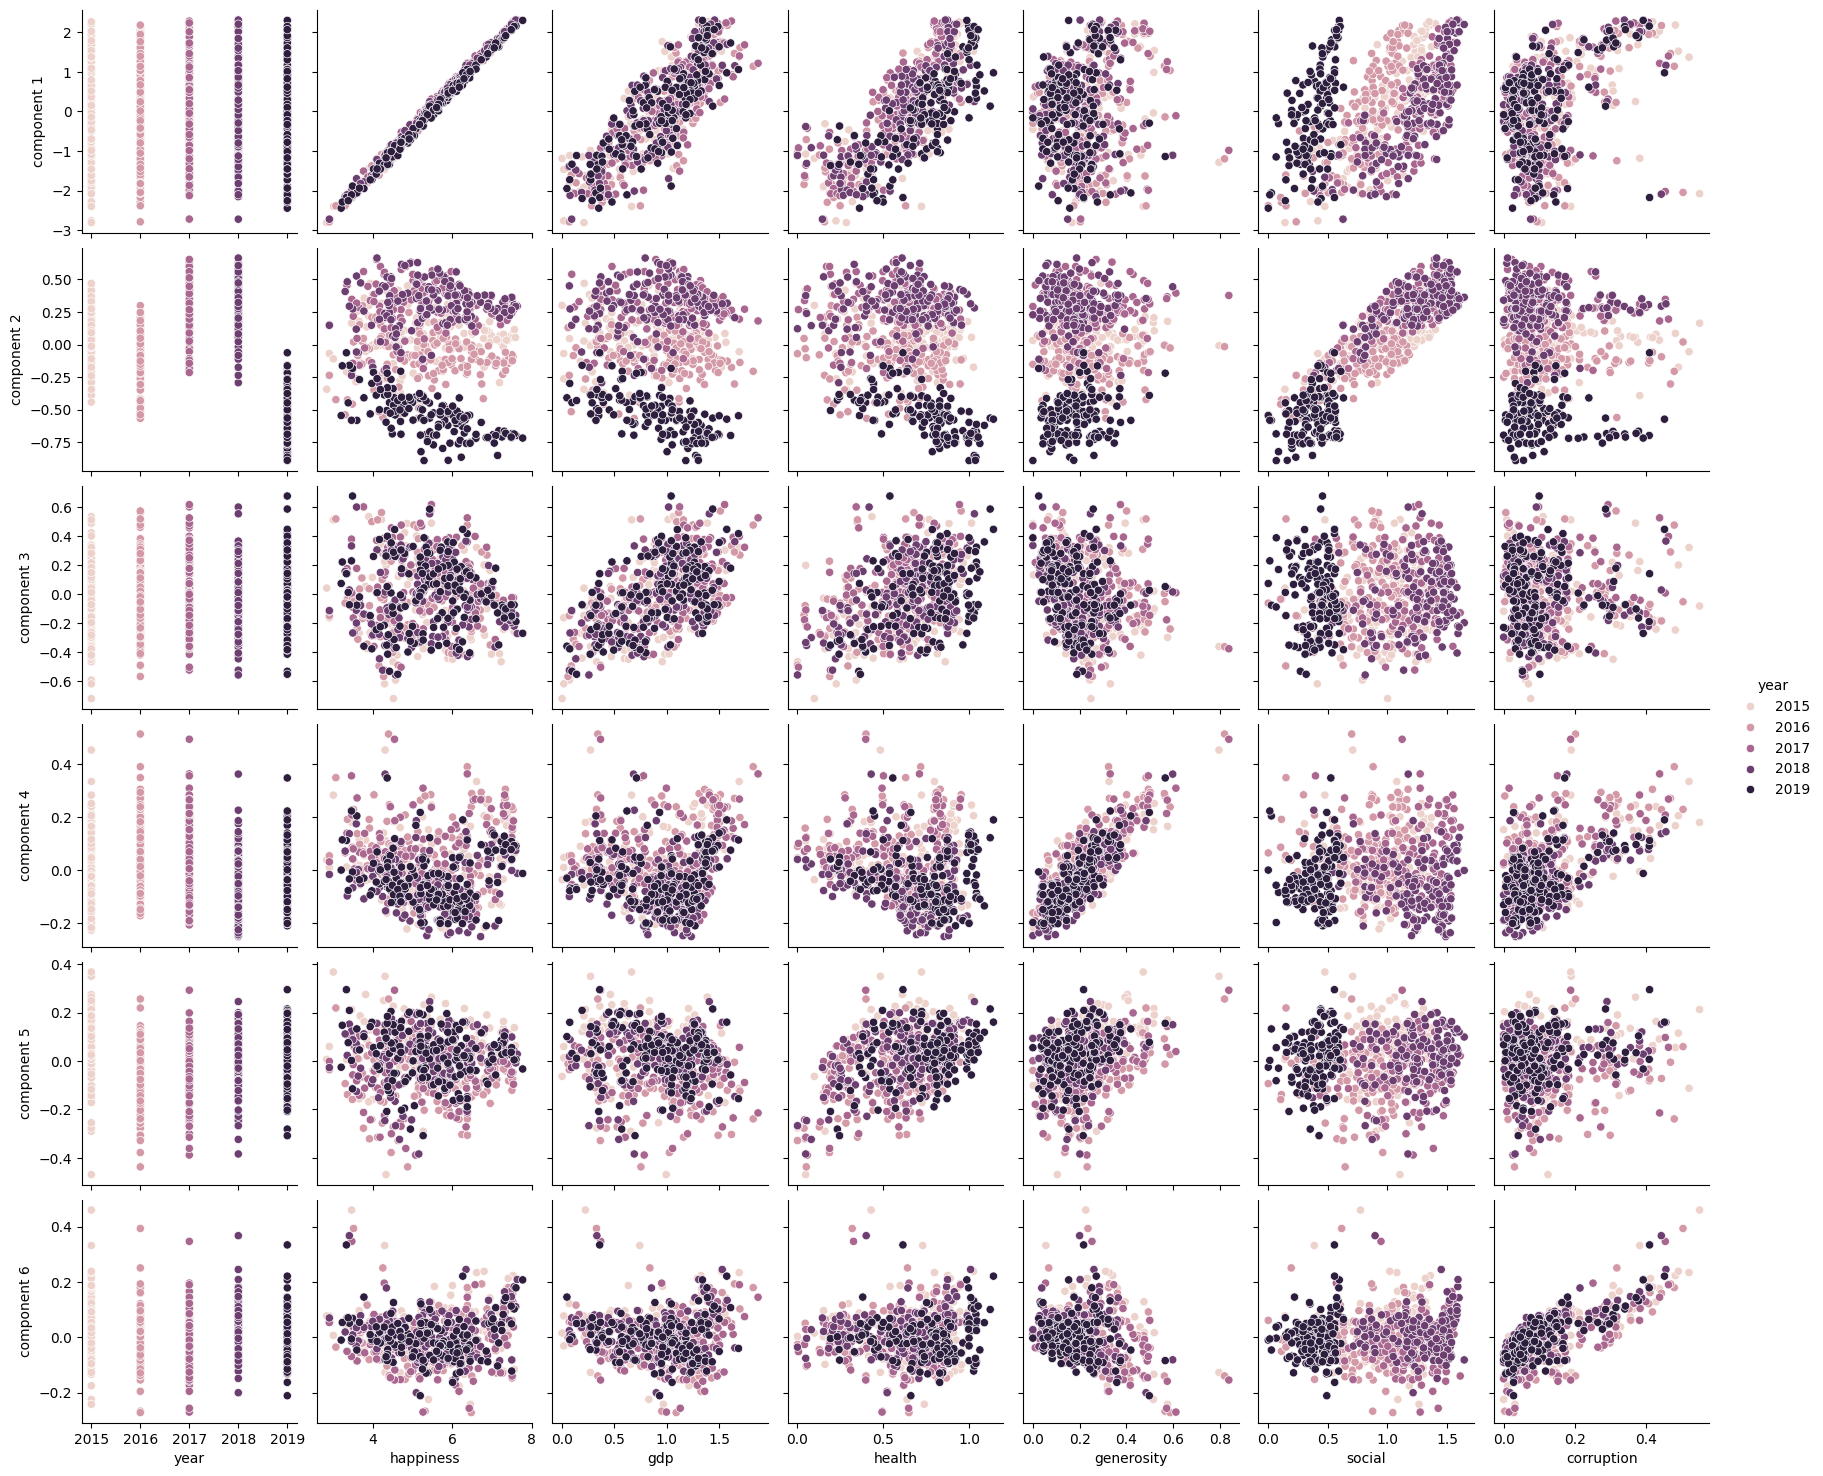

In [16]:
sns.pairplot(projected_data, hue='year', x_vars=quantitative_variables, y_vars=components);

## Scree plot

Draw a scree plot to select a number of components.

Run the PCA with the maximum likelihood estimator technique to automatically select components.

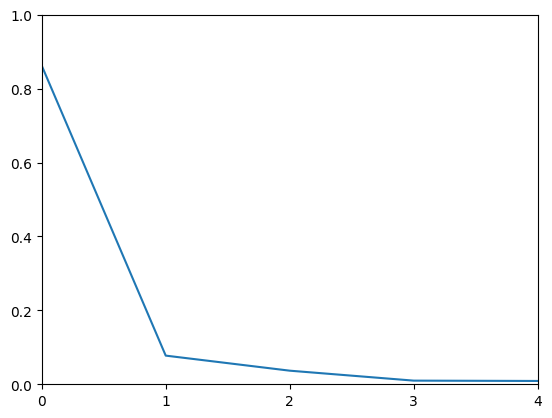

In [17]:
pca = PCA(n_components='mle').fit(df[truly_quantitative_variables])
ax = sns.lineplot(pca.explained_variance_ratio_)
ax.set_ylim([0, 1])
ax.set_xlim([0, pca.n_components_ - 1])
ax.set_xticks(range(pca.n_components_));

# UMAP

*umap-learn* is now listed in the *requirements.txt* file. Just in case:

In [ ]:
!"{sys.executable}" -m pip install --upgrade umap-learn

Carry out a 2D UMAP transform with whatever parameter values (*e.g.* 10 neighbors and unit minimum distance).

Plot the UMAP-projected points colored by region and score.

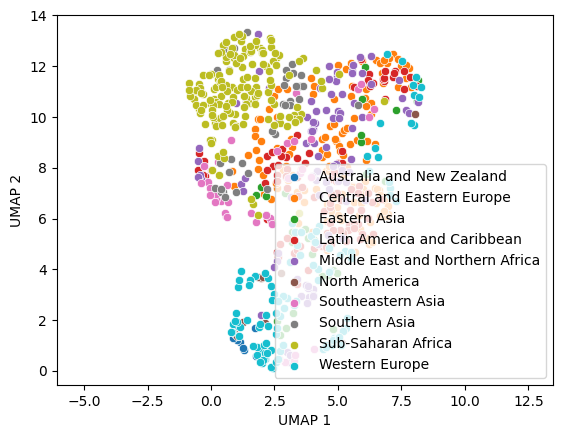

In [25]:
import umap

from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(df[truly_quantitative_variables])

umap_projected_data = umap.UMAP(
    n_neighbors = 25,
    min_dist = 0.5,
).fit_transform(scaled_data)

for region in np.unique(df['region']):
    region_data = umap_projected_data[df['region'] == region, :]
    ax = sns.scatterplot(
        x=region_data[:, 0],
        y=region_data[:, 1],
        label=region,
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');

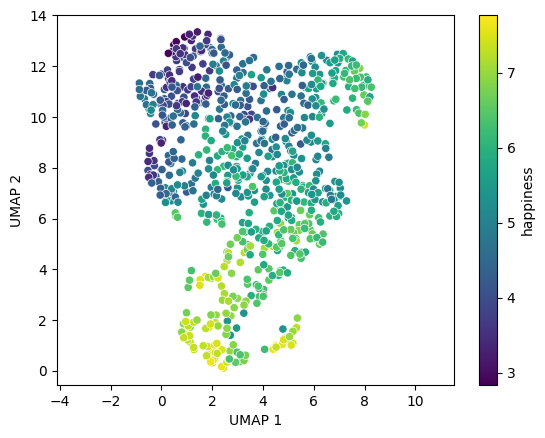

In [28]:
ax = sns.scatterplot(
    x=umap_projected_data[:, 0],
    y=umap_projected_data[:, 1],
    c=df['happiness'],
)
plt.colorbar(ax.get_children()[0], label='happiness')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');

For illustration purpose, we may seek for the set of UMAP parameters that maximizes the separation between two groups.
This can be done by maximizing the Silhouette score:

In [29]:
from sklearn.metrics import silhouette_score

Let us try to highlight the Occident (*USA/Canada* and *Europe*) *vs* rest of the world.

In [30]:
# indicator variables
group1 = (df['region'] == 'USA/Canada') | (df['region'] == 'Europe')
group2 = ~group1

#group1 = (df['region'] == 'Asia')
#group2 = (df['region'] == 'Latin America/Caribbean')

def objective_function(projected_data):
    x = projected_data[group1, :]
    y = projected_data[group2, :]
    score = silhouette_score(np.vstack((x, y)), np.repeat([0, 1], [x.shape[0], y.shape[0]]))
    return score

Find the combination of parameter values that maximizes the above score, using a grid search with neighbor counts 2, 3, 5, 10, 20, 30, 50, 100 and minimum distances 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0.

In [31]:
param_grid = {'n_neighbors': [2, 3, 5, 10, 20, 30, 50, 100], 'min_dist': np.arange(.1, 1.1, .1)}
param_grid

{'n_neighbors': [2, 3, 5, 10, 20, 30, 50, 100],
 'min_dist': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

Run the exhaustive grid search (takes time):

In [32]:
grid_n_neighbors = []
grid_min_dist = []
grid_scores = []

for n_neighbors in param_grid['n_neighbors']:
    for min_dist in param_grid['min_dist']:
        
        embedding = umap.UMAP(
            n_neighbors=n_neighbors,
            min_dist=min_dist,
        ).fit(scaled_data)
        projected_data = embedding.transform(scaled_data)
        score = objective_function(projected_data)
        
        grid_n_neighbors.append(n_neighbors)
        grid_min_dist.append(min_dist)
        grid_scores.append(score)

grid_results = pd.DataFrame({'n_neighbors': grid_n_neighbors, 'min_dist': grid_min_dist, 'silhouette': grid_scores})
grid_results

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Find out which combination works best and plot the projected data again:

In [33]:
best = np.argmax(grid_scores)
best_n_neighbors = grid_n_neighbors[best]
best_min_dist = grid_min_dist[best]

print('n_neighbors:', best_n_neighbors, ', min_dist:', best_min_dist, ', score:', grid_scores[best])

ValueError: attempt to get argmax of an empty sequence

In [34]:
new_projected_data = umap.UMAP(
    n_neighbors=best_n_neighbors,
    min_dist=best_min_dist,
).fit_transform(scaled_data)

NameError: name 'best_n_neighbors' is not defined

In [35]:
for region in np.unique(df['region']):
    region_data = new_projected_data[df['region'] == region, :]
    ax = sns.scatterplot(
        x=region_data[:, 0],
        y=region_data[:, 1],
        label=region,
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');

NameError: name 'new_projected_data' is not defined

# Agglomerative clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering

agglomerated_clusters = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(scaled_data)

In [37]:
from scipy.cluster.hierarchy import dendrogram

# copy-pasted from https://scikit-learn.org/1.7/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    return dendrogram(linkage_matrix, **kwargs)

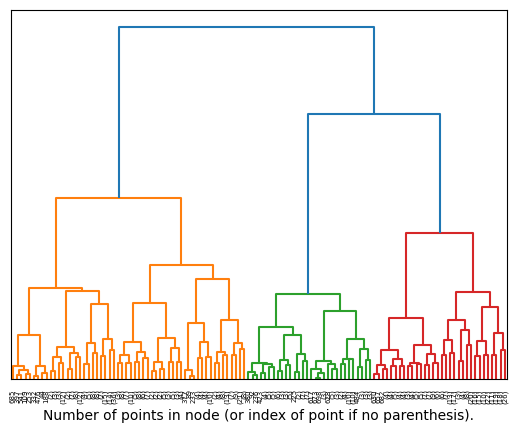

In [38]:
plot_dendrogram(agglomerated_clusters, truncate_mode="level", p=6)
ax = plt.gca()
ax.set_xlabel("Number of points in node (or index of point if no parenthesis).")
ax.set_yticks([]);

# More basic clustering

k-means.

In [39]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=3, n_init=10).fit(scaled_data)

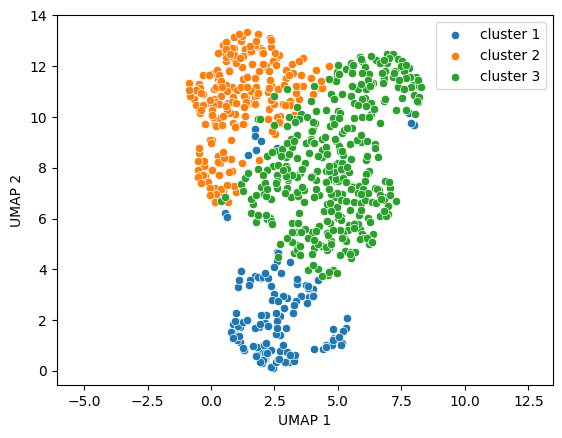

In [40]:
for cluster in range(k_means.n_clusters):
    cluster_data = umap_projected_data[k_means.labels_ == cluster, :]
    ax = sns.scatterplot(
        x=cluster_data[:, 0],
        y=cluster_data[:, 1],
        label=f'cluster {cluster+1}',
    )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_aspect('equal', 'datalim');